# First: explore the data
* Are there any data quality issues present?
* Are there any fields that are challenging to understand?

## Data Loading

In [5]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Data Loading
User = pd.read_csv('USER_TAKEHOME.csv')
Transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv')
Product = pd.read_csv('PRODUCTS_TAKEHOME.csv')

## Overview of each data set

### Overview - User
#### Data quality issues:
1. There are null values in 4 columns.(BIRTH_DATE, STATE, LANGUAGE, GENDER)

In [7]:
# Quick look of User data
User.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [8]:
# Show the User infomation
User.info()
## There are null values in 4 columns.(BIRTH_DATE, STATE, LANGUAGE, GENDER)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [9]:
# User: ID
## Calculate the number of unique USER_ID, checking if there is duplicate USER_ID
User['ID'].nunique()
## ID in User has no duplicate. 100000 users in this table

100000

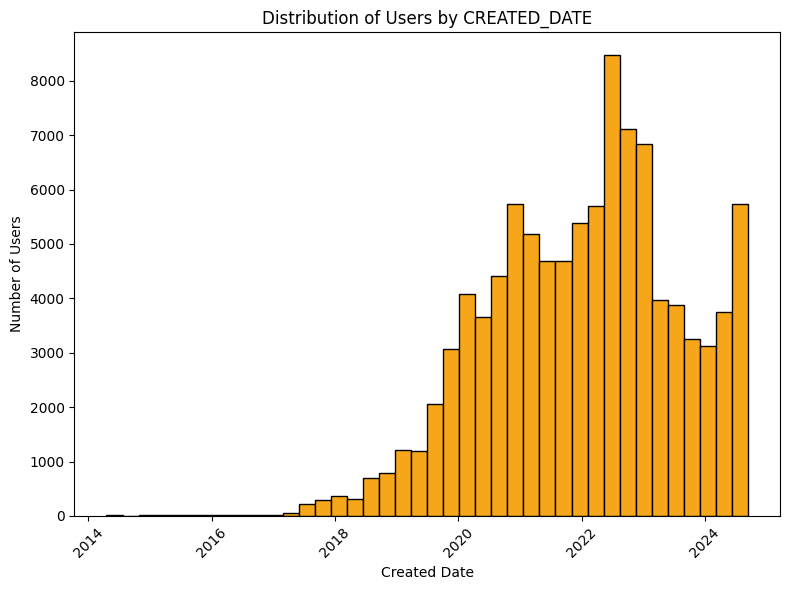

In [10]:
# User: CREATED_DATE
## Convert CREATED_DATE to datetime format
User['CREATED_DATE'] = pd.to_datetime(User['CREATED_DATE'])

## Create a histogram to show the distribution of user creation dates based on each quarter
plt.figure(figsize=(8, 6))
plt.hist(User['CREATED_DATE'].dt.date, bins=40, color='#f8a619', edgecolor='black')
plt.title('Distribution of Users by CREATED_DATE')
plt.xlabel('Created Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()

## Show the plot
plt.show()

In [11]:
# User: BIRTH_DATE
import pandas as pd

## Convert BIRTH_DATE to datetime format
User['BIRTH_DATE'] = pd.to_datetime(User['BIRTH_DATE'], errors='coerce')

## Calculate age
User['AGE'] = (pd.Timestamp.now() - User['BIRTH_DATE']).dt.days // 365

## Define age bins and labels
bins = [-1, 19, 29, 39, 49, 59, 69, 79, 89, 99, float('inf')]
labels = ['Under 20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', 'Over 100']

## Create a new column for age groups
User['AGE_GROUP'] = pd.cut(User['AGE'], bins=bins, labels=labels, right=True)

## Count the occurrences in each age group
age_distribution = User['AGE_GROUP'].value_counts().sort_index()

## Convert to DataFrame for better representation
age_distribution_df = age_distribution.reset_index()
age_distribution_df.columns = ['AGE_GROUP', 'COUNT']

## Display the age distribution DataFrame
print(age_distribution_df)

TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects

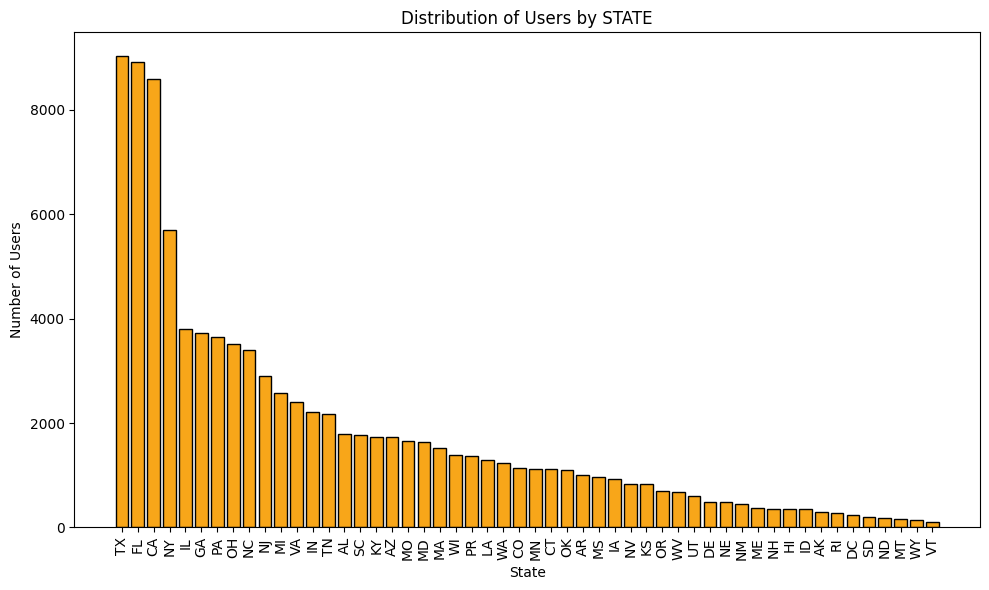

In [12]:
# User: STATE
## Calculate the number of uses in each state
state_counts = User['STATE'].value_counts()

## Create a bar chart to show the distribution of users by STATE
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values, color='#f8a619', edgecolor='black')
plt.title('Distribution of Users by STATE')
plt.xlabel('State')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.tight_layout()

## Show the plot
plt.show()

LANGUAGE
en        63403
es-419     6089
Name: count, dtype: int64


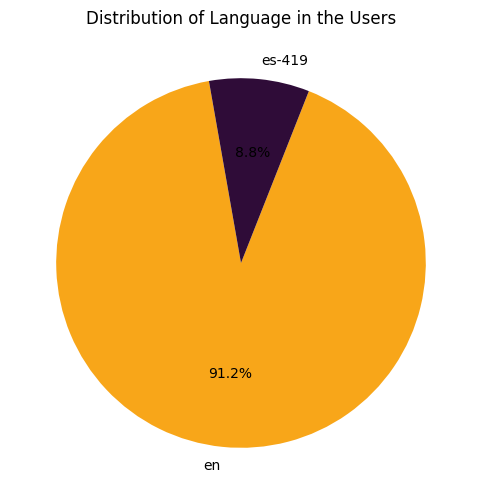

In [13]:
# User: LANGUAGE
## Count the occurrences of each gender
language_counts = User['LANGUAGE'].value_counts()
print(language_counts)

## Use the Fetch colors 
colors = ['#f8a619', '#2f0c38']

## Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=100, colors=colors)
plt.title('Distribution of Language in the Users')

## Show the plot
plt.show()

GENDER
female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64


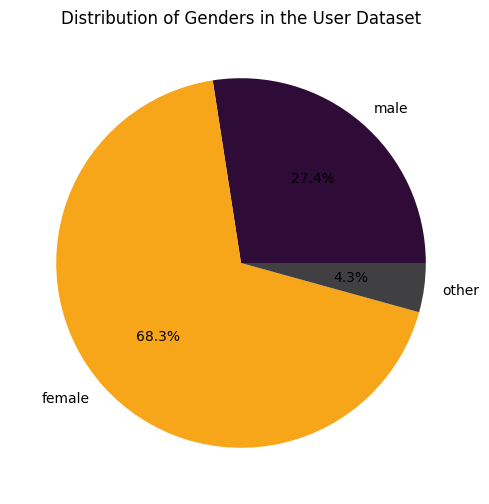

In [15]:
# User: GENDER
## Count the occurrences of each gender
gender_counts = User['GENDER'].value_counts()
print(gender_counts) # There is 'unknown' type also shows in GENDER, which should be considered as missing value, and needed to be figured out.

## Group all types except 'male' and 'female' into 'Other'
gender_counts['other'] = gender_counts.drop(['male', 'female']).sum()
gender_counts = gender_counts[['male', 'female', 'other']]

## Use the Fetch colors 
colors = ['#2f0c38', '#f8a619', '#403f41']

## Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Distribution of Genders in the User Dataset')

## Show the plot
plt.show()

### Overview - Transaction
#### Data quality issues:
1. Null values (double check)
2. "FINAL_QUANTIY" should be numeric column, but it shows 'zero'(string) instead of 0(numeric), it might cause some problems or inconsistency.

In [16]:
# Quick look of Transaction data
Transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [17]:
# Show the Transaction infomation
Transaction.info()
## Null values in BARCODE column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [18]:
# Transaction: RECEIPT_ID
## Calculate the unique number of RECEIPT_ID
Transaction['RECEIPT_ID'].nunique() 

## Count occurrences of each RECEIPT_ID
receipt_id_counts = Transaction['RECEIPT_ID'].value_counts()

## Filter for RECEIPT_IDs that have duplicates (count > 1)
receipt_id_duplicate = receipt_id_counts[receipt_id_counts > 1]

## Convert to a DataFrame which shows the DUPLICATE_COUNT for each duplicate RECEIPT_ID
receipt_id_duplicate_df = receipt_id_duplicate.reset_index()
receipt_id_duplicate_df.columns = ['RECEIPT_ID', 'DUPLICATE_COUNT']

## Display the DataFrame of duplicate RECEIPT_IDs
receipt_id_duplicate_df

## Transaction data has 50000 rows but has only 24440 unique RECEIPT_ID, which means there are 25560 duplicate RECEIPT_ID

,RECEIPT_ID,DUPLICATE_COUNT
0,bedac253-2256-461b-96af-267748e6cecf,12
1,bc304cd7-8353-4142-ac7f-f3ccec720cb3,8
2,4ec870d2-c39f-4a40-bf8a-26a079409b20,8
3,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,8
4,760c98da-5174-401f-a203-b839c4d406be,8
...,...,...
24435,56a368e6-d677-459d-ba05-70a886c3126b,2
24436,56a0e14c-187c-43ec-96ab-b67ac5c197f1,2
24437,569f4be9-63d1-4afd-8ed5-d520ce85b878,2
24438,56946262-15b1-41fd-8814-fc544d35fc6c,2


In [19]:
# Transaction: PURCHASE_DATE & SCAN_DATE
## Calculate a new column which shows the difference between PURCHASE_DATE and SCAN_DATE
# Convert PURCHASE_DATE and SCAN_DATE to datetime format
Transaction['PURCHASE_DATE'] = pd.to_datetime(Transaction['PURCHASE_DATE'], errors='coerce')
Transaction['SCAN_DATE'] = pd.to_datetime(Transaction['SCAN_DATE'], errors='coerce')

# Calculate the time difference in hours
Transaction['TIME_DIFFERENCE'] = (Transaction['SCAN_DATE'] - Transaction['PURCHASE_DATE']).dt.date() / 3600

# Create bins for time differences
bins = [-float('inf'), 0, 1, 3, 6, 12, 24, float('inf')]
labels = ['Negative', '0-1 hours', '1-3 hours', '3-6 hours', '6-12 hours', '12-24 hours', 'More than 24 hours']

# Create a new column for the binned time difference
Transaction['TIME_DIFF_GROUP'] = pd.cut(Transaction['TIME_DIFFERENCE'], bins=bins, labels=labels)

# Count occurrences in each time difference group
time_diff_counts = Transaction['TIME_DIFF_GROUP'].value_counts().sort_index()

# Create a bar plot to show the distribution of time differences
plt.figure(figsize=(10, 6))
plt.bar(time_diff_counts.index, time_diff_counts.values, color='#f8a619', edgecolor='black')
plt.title('Distribution of Time Difference between PURCHASE_DATE and SCAN_DATE')
plt.xlabel('Time Difference Groups')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects

In [20]:
# Transaction: FINAL_QUANTITY
## Check the quantity entries are all numbers
unique_final_quantity_values = Transaction['FINAL_QUANTITY'].unique()
print(unique_final_quantity_values) ## string:'zero': shows in FINAL_QUANTITY

## Save the transactions which have 'zero' quantity in FINAL_QUANTITY as 'zero_quantity'
zero_quantity = Transaction[Transaction['FINAL_QUANTITY'] == 'zero']

## Check if 'zero_quantity' are all have duplicate enties
transactions_with_zero_quantity = Transaction[Transaction['RECEIPT_ID'].isin(zero_quantity['RECEIPT_ID'])]
receipt_counts = transactions_with_zero_quantity.groupby(['RECEIPT_ID', 'BARCODE']).size()

## Check if all counts are at least 2
at_least_twice = (receipt_counts >= 2).all()

## Show the results
print("Occurrences of each RECEIPT_ID:\n", receipt_counts)
print("All RECEIPT_IDs occur at least twice:", at_least_twice) # TRUE. It might implies there are some data entry issues

## The name is inconsistent with Entity Relationship Model (FINAL_QUANTITY & quantity)
## According to Entity Relationship Model, FINAL_QUANTITY should be numeric, but shows 'zero', which is a string.
## This might cause some inconsistent and calculation issues when doing calculations.
## Also, if the final_quantity is 0, then there might be redundancy in this data.
## Group by same RECEIPT_ID and BARCODE, those transaction with 'zero' quantity record also shows duplicate in RECEIPT_ID

['1.00' 'zero' '2.00' '3.00' '4.00' '4.55' '2.83' '2.34' '0.46' '7.00'
 '18.00' '12.00' '5.00' '2.17' '0.23' '8.00' '1.35' '0.09' '2.58' '1.47'
 '16.00' '0.62' '1.24' '1.40' '0.51' '0.53' '1.69' '6.00' '2.39' '2.60'
 '10.00' '0.86' '1.54' '1.88' '2.93' '1.28' '0.65' '2.89' '1.44' '2.75'
 '1.81' '276.00' '0.87' '2.10' '3.33' '2.54' '2.20' '1.93' '1.34' '1.13'
 '2.19' '0.83' '2.61' '0.28' '1.50' '0.97' '0.24' '1.18' '6.22' '1.22'
 '1.23' '2.57' '1.07' '2.11' '0.48' '9.00' '3.11' '1.08' '5.53' '1.89'
 '0.01' '2.18' '1.99' '0.04' '2.25' '1.37' '3.02' '0.35' '0.99' '1.80'
 '3.24' '0.94' '2.04' '3.69' '0.70' '2.52' '2.27']
Occurrences of each RECEIPT_ID:
 RECEIPT_ID                            BARCODE     
000239aa-3478-453d-801e-66a82e39c8af  7.833997e+11    2
0002d8cd-1701-4cdd-a524-b70402e2dbc0  6.811314e+11    2
00096c49-8b04-42f9-88ce-941c5e06c4a7  7.830007e+10    2
0019ec79-cbb3-41ed-b84c-cd74d04553f8  5.150025e+10    2
001f2f3f-1746-4217-a98f-73c63c63bae2  4.600029e+10    2
           

In [21]:
# Transaction: FINAL_SALE
final_sale_index = Transaction['FINAL_SALE'].unique()
# check the index
final_sale_index

## Some rows in 'FINAL_SALE' shows ' ', which should be considered missing values
## Based on the finidings in 'FINAL_QUANTITY' and 'FINAL_SALE', we can try clean the data by filtering duplicate (FINAL_QUANTITY='zero' & FINAL_SALE=' 'or '0.00')

array([' ', '1.49', '3.49', ..., '11.02', '20.17', '42.38'], dtype=object)

In [22]:
# Make a copy of the Transaction DataFrame
## To ensure the original data keeps the same
Transaction_copy = Transaction.copy()

# Define the filter condition
filter_condition = (Transaction_copy['FINAL_QUANTITY'] != 'zero') & (Transaction_copy['FINAL_SALE'] != ' ') & (Transaction_copy['FINAL_SALE'] != '0.00')

# Create a new DataFrame: Transaction_filtered using the filter condition
Transaction_filtered = Transaction_copy[filter_condition]

# Check Transaction_filtered information
Transaction_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24679 entries, 25000 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      24679 non-null  object             
 1   PURCHASE_DATE   24679 non-null  datetime64[ns]     
 2   SCAN_DATE       24679 non-null  datetime64[ns, UTC]
 3   STORE_NAME      24679 non-null  object             
 4   USER_ID         24679 non-null  object             
 5   BARCODE         22005 non-null  float64            
 6   FINAL_QUANTITY  24679 non-null  object             
 7   FINAL_SALE      24679 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(5)
memory usage: 1.7+ MB


In [23]:
# Check if Transaction_filtered have duplicate values
duplicate_transaction = Transaction_filtered[Transaction_filtered.duplicated()]
duplicate_transaction

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25717,42ddbfbc-7356-4c25-9c35-cc1e28f36e72,2024-09-06,2024-09-08 12:45:47.756000+00:00,SMITH'S,63ad1f1f01cb7c888c6ffc08,3.111117e+11,1.00,1.00
25924,760c98da-5174-401f-a203-b839c4d406be,2024-09-06,2024-09-07 14:52:46.822000+00:00,HY-VEE,663d07d0b7b24d45d93a9f36,2.700050e+10,1.00,1.48
25925,760c98da-5174-401f-a203-b839c4d406be,2024-09-06,2024-09-07 14:52:46.822000+00:00,HY-VEE,663d07d0b7b24d45d93a9f36,2.700050e+10,1.00,1.48
25926,760c98da-5174-401f-a203-b839c4d406be,2024-09-06,2024-09-07 14:52:46.822000+00:00,HY-VEE,663d07d0b7b24d45d93a9f36,2.700050e+10,1.00,1.48
26315,53ebe921-9113-4b13-959f-2dc7cc4731c5,2024-07-30,2024-07-30 12:15:25.708000+00:00,WALMART,634444761aaccf0b216b884b,1.600021e+10,1.00,1.58
...,...,...,...,...,...,...,...,...
49651,93f45c94-af38-42d4-a3fe-eb9d5b24efbb,2024-09-03,2024-09-08 12:20:50.611000+00:00,PUBLIX,660a0ce6828f877fdee915a1,NaN,1.00,4.40
49660,eee21773-6946-474a-9978-fe0659140973,2024-07-26,2024-07-29 20:40:25.073000+00:00,PUBLIX,60cff0e7e265b446d62200b2,4.178027e+10,1.00,4.79
49759,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835000+00:00,WALMART,614e733372ba844aa8dc345e,4.178900e+10,1.00,0.52
49911,874a8116-3342-4b4a-9d24-4666e0ab1052,2024-08-31,2024-08-31 22:41:03.829000+00:00,CVS,63a4ef6bb5f32149b9d86e66,NaN,1.00,3.00


In [24]:
# Filter Transaction_filtered DataFrame to keep only unique combinations of RECEIPT_ID and BARCODE
Transaction_filtered_final = Transaction_filtered.drop_duplicates()
# Check 
Transaction_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24538 entries, 25000 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      24538 non-null  object             
 1   PURCHASE_DATE   24538 non-null  datetime64[ns]     
 2   SCAN_DATE       24538 non-null  datetime64[ns, UTC]
 3   STORE_NAME      24538 non-null  object             
 4   USER_ID         24538 non-null  object             
 5   BARCODE         21882 non-null  float64            
 6   FINAL_QUANTITY  24538 non-null  object             
 7   FINAL_SALE      24538 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(5)
memory usage: 1.7+ MB


### Overview - Product
#### Data quality issues:
1. There are null values in 'BARCODE' column.

In [25]:
# Quick look of Product data
Product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [26]:
# Show the User infomation
Product.info()
## There are null values in 4 columns.(CATEGORY_3, CATEGORY_4, MANUFACTURER, BRAND)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [27]:
# Check if Product have duplicate
Product.duplicated().sum()

# Drop duplicate rows
Product_cleaned = Product.drop_duplicates()
Product_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845226 non-null  object 
 1   CATEGORY_2    843915 non-null  object 
 2   CATEGORY_3    784774 non-null  object 
 3   CATEGORY_4    67453 non-null   object 
 4   MANUFACTURER  618873 non-null  object 
 5   BRAND         618875 non-null  object 
 6   BARCODE       841369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 51.6+ MB


In [28]:
# Count the number of products based on their categories
category_counts = Product_cleaned.groupby(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4'])['BARCODE'].nunique()\
    .reset_index(name='Distinct Count').sort_values(by='Distinct Count', ascending=False)

# Show the top 20 result
category_counts.head(20)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,Distinct Count
82,Health & Wellness,Skin Care,Lip Balms & Treatments,Lip Balms,9712
123,Snacks,Puffed Snacks,Popcorn,Already Popped Popcorn,6956
80,Health & Wellness,Medicines & Treatments,Sleeping & Snoring,Sleep Aids,4968
58,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,4720
66,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,3871
62,Health & Wellness,Hair Removal,Razors,Men's Razors,2833
76,Health & Wellness,Medicines & Treatments,Digestive Health Medicines & Treatments,Heartburn & Antacids Medicines & Treatments,2747
74,Health & Wellness,Medicines & Treatments,Digestive Health Medicines & Treatments,Constipation Relief Medicines & Treatments,2733
70,Health & Wellness,Medicines & Treatments,Cough & Cold Medicines & Treatments,Immune Support,2675
124,Snacks,Puffed Snacks,Popcorn,Microwave Popcorn,2308


# Second: provide SQL queries
In this section, I will use spark sql and the data cleaned in section 1 to answer the three questions.

* Closed-ended questions:
1. What are the top 5 brands by receipts scanned among users 21 and over?
2. What are the top 5 brands by sales among users that have had their account for at least six months?
3. What is the percentage of sales in the Health & Wellness category by generation?
* Open-ended questions: for these, make assumptions and clearly state them when answering the question.
1. Who are Fetch’s power users?
2. Which is the leading brand in the Dips & Salsa category?
3. At what percent has Fetch grown year over year?

## pyspark.sql setting

In [50]:
# import pyspark and pyspark.sql
import pyspark
from pyspark.sql import SparkSession

In [51]:
# Create a Spark session with name as 'Fetch_take_home_assessment'
spark = SparkSession.builder \
    .appName('Fetch_take_home_assessment') \
    .getOrCreate()

# Confirm the Spark session is created
print("Spark session created:", spark)

Spark session created: <pyspark.sql.session.SparkSession object at 0x1064a5430>


## Data Loading
* Convert the pandas dataframe to a spark dataframe

In [56]:
User['BIRTH_DATE'] = User['BIRTH_DATE'].astype(str)
User['CREATED_DATE'] = User['CREATED_DATE'].astype(str)

In [66]:
# User
#spark.read.csv('USER_TAKEHOME.csv', header=True, inferSchema=True).registerTempTable('User')
User_spark = spark.createDataFrame(User) 
User_spark.createOrReplaceTempView('User')

spark.sql('''SELECT * 
          FROM User
          LIMIT 5''').show()

+--------------------+--------------------+--------------------+-----+--------+------+
|                  ID|        CREATED_DATE|          BIRTH_DATE|STATE|LANGUAGE|GENDER|
+--------------------+--------------------+--------------------+-----+--------+------+
|5ef3b4f17053ab141...|2020-06-24 20:17:...|2000-08-11 00:00:...|   CA|  es-419|female|
|5ff220d383fcfc126...|2021-01-03 19:53:...|2001-09-24 04:00:...|   PA|      en|female|
|6477950aa55bb77a0...|2023-05-31 18:42:...|1994-10-28 00:00:...|   FL|  es-419|female|
|658a306e99b40f103...|2023-12-26 01:46:...|                 NaT|   NC|      en|   NaN|
|653cf5d6a225ea102...|2023-10-28 11:51:...|1972-03-19 00:00:...|   PA|      en|female|
+--------------------+--------------------+--------------------+-----+--------+------+



In [67]:
# Transaction_filtered_final: I use the cleanred Transaction which filtered duplicates and some unreasonable values
Transaction_spark = spark.createDataFrame(Transaction_filtered_final) 
Transaction_spark.createOrReplaceTempView('Transaction_filtered_final')
# Product_cleaned: I use the cleaned Product which drop the duplicates above
Product_spark = spark.createDataFrame(Product_cleaned)
Product_spark.createOrReplaceTempView('Product_cleaned')

# Register the Spark DataFrame as a temporary view
#User_spark.createOrReplaceTempView('User')
#Transaction_spark.createOrReplaceTempView('Transaction_filtered_final')
#Product_spark.createOrReplaceTempView('Product_cleaned')

In [65]:
spark.sql('''SELECT * FROM Transaction_filtered_final''').show()

<bound method DataFrame.show of DataFrame[RECEIPT_ID: string, PURCHASE_DATE: timestamp, SCAN_DATE: timestamp, STORE_NAME: string, USER_ID: string, BARCODE: double, FINAL_QUANTITY: string, FINAL_SALE: string]>

In [62]:
# Quick look of each data set
# User
spark.sql('''SELECT * FROM User''').show()
spark.sql('''SELECT * FROM Transaction_filtered_final''').show()
spark.sql('''SELECT * FROM Product_cleaned''').show()

<bound method DataFrame.show of DataFrame[ID: string, CREATED_DATE: string, BIRTH_DATE: string, STATE: string, LANGUAGE: string, GENDER: string]>

### Closed-ended questions

### What are the top 5 brands by receipts scanned among users 21 and over?

In [121]:
# What are the top 5 brands by receipts scanned among users 21 and over?
spark.sql('''
-- SELECT the Target_user who are 21 and over
WITH Target_user AS (
  SELECT u2.*
  FROM (
    SELECT u1.id,
           CAST(DATEDIFF(current_date(), u1.birth_date) / 365 AS INT) AS age
    FROM User u1
  ) AS u2
  WHERE u2.age >= 21
)
SELECT p.brand, COUNT(DISTINCT t.receipt_id) AS count_of_receipt
FROM Transaction_filtered_final t INNER JOIN Target_user tu ON t.user_id = tu.id
  LEFT JOIN Product_cleaned p ON t.barcode = p.barcode
GROUP BY p.brand
HAVING p.brand IS NOT NULL
          AND p.brand <> 'NaN' -- filter records with unknown or null brand name
ORDER BY count_of_receipt DESC
LIMIT 5
''').show()

24/10/28 16:48:21 WARN TaskSetManager: Stage 357 contains a task of very large size (3876 KiB). The maximum recommended task size is 1000 KiB.


+---------------+----------------+
|          brand|count_of_receipt|
+---------------+----------------+
|           DOVE|              14|
|    NERDS CANDY|              14|
|      COCA-COLA|              13|
|SOUR PATCH KIDS|              13|
|      HERSHEY'S|              13|
+---------------+----------------+



In [128]:
# What is the percentage of sales in the Health & Wellness category by generation?
# Generation and age reference: https://www.beresfordresearch.com/age-range-by-generation/
spark.sql('''
-- Calculate users' age
WITH Generation_group AS (
  SELECT 
    u2.ID,
    CASE
      WHEN u2.age >= 12 AND age < 28 THEN 'Gen Z'
      WHEN u2.age >= 28 AND age < 44 THEN 'Millennials'
      WHEN u2.age >= 44 AND age < 60 THEN 'Gen X'
      WHEN u2.age >= 60 THEN 'Boomers'
    END AS generation
  FROM (
    SELECT 
      u1.ID,
      CAST(DATEDIFF(current_date(), u1.birth_date) / 365 AS INT) AS age
    FROM User u1
  ) u2
), Product_in_Health_Wellness AS (
SELECT p1.BARCODE, p1.CATEGORY_1
FROM Product_cleaned p1
WHERE p1.CATEGORY_1 == 'Health & Wellness'
), Sales_in_Health_Wellness AS (
  SELECT t.BARCODE, t.FINAL_SALE
  FROM Transaction_filtered_final t Product_in_Health_Wellness p2 ON t.BARCODE = p2.BARCODE
)
SELECT *
FROM Sales_in_Health_Wellness
''').show()


ParseException: 
[PARSE_SYNTAX_ERROR] Syntax error at or near 'Product_in_Health_Wellness'.(line 24, pos 36)

== SQL ==

-- Calculate users' age
WITH Generation_group AS (
  SELECT 
    u2.ID,
    CASE
      WHEN u2.age >= 12 AND age < 28 THEN 'Gen Z'
      WHEN u2.age >= 28 AND age < 44 THEN 'Millennials'
      WHEN u2.age >= 44 AND age < 60 THEN 'Gen X'
      WHEN u2.age >= 60 THEN 'Boomers'
    END AS generation
  FROM (
    SELECT 
      u1.ID,
      CAST(DATEDIFF(current_date(), u1.birth_date) / 365 AS INT) AS age
    FROM User u1
  ) u2
), Product_in_Health_Wellness AS (
SELECT p1.BARCODE, p1.CATEGORY_1
FROM Product_cleaned p1
WHERE p1.CATEGORY_1 == 'Health & Wellness'
), Sales_in_Health_Wellness AS (
  SELECT t.BARCODE, t.FINAL_SALE
  FROM Transaction_filtered_final t Product_in_Health_Wellness p2 ON t.BARCODE = p2.BARCODE
------------------------------------^^^
)
SELECT *
FROM Sales_in_Health_Wellness


In [144]:
spark.sql('''-- Calculate users' age and categorize into generations
WITH Generation_group AS (
  SELECT 
    u2.ID,
    CASE
      WHEN u2.age >= 12 AND u2.age < 28 THEN 'Gen Z'
      WHEN u2.age >= 28 AND u2.age < 44 THEN 'Millennials'
      WHEN u2.age >= 44 AND u2.age < 60 THEN 'Gen X'
      WHEN u2.age >= 60 THEN 'Boomers'
    END AS generation
  FROM (
    SELECT 
      u1.ID,
      CAST(DATEDIFF(current_date(), u1.birth_date) / 365 AS INT) AS age
    FROM User u1
  ) u2
), 
-- Join transactions with the relevant products to filter only Health & Wellness sales
Sales_in_Health_Wellness AS (
  SELECT t.USER_ID, SUM(t.FINAL_SALE), SUM(SUM(t.FINAL_SALE)) OVER (PARTITION BY CATEGORY_1) AS Total_Sale
  FROM Transaction_filtered_final t INNER JOIN Product_cleaned p2 ON t.BARCODE = p2.BARCODE
  GROUP BY t.USER_ID, p2.CATEGORY_1
)
SELECT *
FROM Sales_in_Health_Wellness s INNER JOIN Generation_group gu ON s.USER_ID = gu.ID
GROUP BY gu.generation
''').show()

AnalysisException: [MISSING_AGGREGATION] The non-aggregating expression "USER_ID" is based on columns which are not participating in the GROUP BY clause.
Add the columns or the expression to the GROUP BY, aggregate the expression, or use "any_value(USER_ID)" if you do not care which of the values within a group is returned.;
WithCTE
:- CTERelationDef 62, false
:  +- SubqueryAlias Generation_group
:     +- Project [ID#432, CASE WHEN ((age#1771 >= 12) AND (age#1771 < 28)) THEN Gen Z WHEN ((age#1771 >= 28) AND (age#1771 < 44)) THEN Millennials WHEN ((age#1771 >= 44) AND (age#1771 < 60)) THEN Gen X WHEN (age#1771 >= 60) THEN Boomers END AS generation#1772]
:        +- SubqueryAlias u2
:           +- Project [ID#432, cast((cast(datediff(current_date(Some(America/New_York)), cast(birth_date#434 as date)) as double) / cast(365 as double)) as int) AS age#1771]
:              +- SubqueryAlias u1
:                 +- SubqueryAlias user
:                    +- View (`User`, [ID#432,CREATED_DATE#433,BIRTH_DATE#434,STATE#435,LANGUAGE#436,GENDER#437])
:                       +- LogicalRDD [ID#432, CREATED_DATE#433, BIRTH_DATE#434, STATE#435, LANGUAGE#436, GENDER#437], false
:- CTERelationDef 63, false
:  +- SubqueryAlias Sales_in_Health_Wellness
:     +- Project [USER_ID#479, sum(FINAL_SALE)#1777, Total_Sale#1773]
:        +- Project [USER_ID#479, sum(FINAL_SALE)#1777, _w0#1778, CATEGORY_1#491, Total_Sale#1773, Total_Sale#1773]
:           +- Window [sum(_w0#1778) windowspecdefinition(CATEGORY_1#491, specifiedwindowframe(RowFrame, unboundedpreceding$(), unboundedfollowing$())) AS Total_Sale#1773], [CATEGORY_1#491]
:              +- Aggregate [USER_ID#479, CATEGORY_1#491], [USER_ID#479, sum(cast(FINAL_SALE#482 as double)) AS sum(FINAL_SALE)#1777, sum(cast(FINAL_SALE#482 as double)) AS _w0#1778, CATEGORY_1#491]
:                 +- Join Inner, (BARCODE#480 = BARCODE#497)
:                    :- SubqueryAlias t
:                    :  +- SubqueryAlias transaction_filtered_final
:                    :     +- View (`Transaction_filtered_final`, [RECEIPT_ID#475,PURCHASE_DATE#476,SCAN_DATE#477,STORE_NAME#478,USER_ID#479,BARCODE#480,FINAL_QUANTITY#481,FINAL_SALE#482])
:                    :        +- LogicalRDD [RECEIPT_ID#475, PURCHASE_DATE#476, SCAN_DATE#477, STORE_NAME#478, USER_ID#479, BARCODE#480, FINAL_QUANTITY#481, FINAL_SALE#482], false
:                    +- SubqueryAlias p2
:                       +- SubqueryAlias product_cleaned
:                          +- View (`Product_cleaned`, [CATEGORY_1#491,CATEGORY_2#492,CATEGORY_3#493,CATEGORY_4#494,MANUFACTURER#495,BRAND#496,BARCODE#497])
:                             +- LogicalRDD [CATEGORY_1#491, CATEGORY_2#492, CATEGORY_3#493, CATEGORY_4#494, MANUFACTURER#495, BRAND#496, BARCODE#497], false
+- Aggregate [generation#1772], [USER_ID#479, sum(FINAL_SALE)#1777, Total_Sale#1773, ID#432, generation#1772]
   +- Join Inner, (USER_ID#479 = ID#432)
      :- SubqueryAlias s
      :  +- SubqueryAlias Sales_in_Health_Wellness
      :     +- CTERelationRef 63, true, [USER_ID#479, sum(FINAL_SALE)#1777, Total_Sale#1773], false
      +- SubqueryAlias gu
         +- SubqueryAlias Generation_group
            +- CTERelationRef 62, true, [ID#432, generation#1772], false


In [152]:
# What is the percentage of sales in the Health & Wellness category by generation?
# Generation and age reference: https://www.beresfordresearch.com/age-range-by-generation/
spark.sql('''
-- Calculate users' age and categorize into generations
WITH Generation_group AS (
  SELECT 
    u.ID,
    CASE
      WHEN u.age >= 12 AND age < 28 THEN 'Gen Z'
      WHEN u.age >= 28 AND age < 44 THEN 'Millennials'
      WHEN u.age >= 44 AND age < 60 THEN 'Gen X'
      WHEN u.age >= 60 THEN 'Boomers'
    END AS generation
  FROM (
    SELECT 
      ID,
      CAST(DATEDIFF(current_date(), birth_date) / 365 AS INT) AS age
    FROM User
  ) u
), 
-- Select products' BARCODE in Health & Wellness category_1
Product_in_Health_Wellness AS (
  SELECT p1.BARCODE
  FROM Product_cleaned p1
  WHERE p1.CATEGORY_1 = 'Health & Wellness'
),
-- Join transactions with relevant products to filter only Health & Wellness sales and calculate sales by generation
Sales_by_Generation AS (
  SELECT 
    gg.generation,
    t.FINAL_SALE
  FROM Transaction_filtered_final t
  INNER JOIN Product_in_Health_Wellness p ON t.BARCODE = p.BARCODE
  INNER JOIN Generation_group gg ON t.USER_ID = gg.ID
),
-- Calculate total sales and the percentage of total sales by generation
Total_and_Percent_Sales AS (
  SELECT 
    generation,
    ROUND(SUM(FINAL_SALE), 2) AS Generation_Sales,
    ROUND(SUM(SUM(FINAL_SALE)) OVER (), 2) AS Total_Sales,
    ROUND(SUM(FINAL_SALE) / SUM(SUM(FINAL_SALE)) OVER () * 100, 2) AS Percentage_Of_Sales
  FROM Sales_by_Generation
  GROUP BY generation
)
SELECT 
  generation,
  Generation_Sales,
  Total_Sales,
  Percentage_Of_Sales
FROM Total_and_Percent_Sales
ORDER BY Percentage_Of_Sales DESC
''').show()

24/10/28 17:29:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/28 17:29:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/28 17:29:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/28 17:29:02 WARN TaskSetManager: Stage 533 contains a task of very large size (3876 KiB). The maximum recommended task size is 1000 KiB.
24/10/28 17:29:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/28 17:29:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/28 17:29:02 WARN WindowExe

+-----------+----------------+-----------+-------------------+
| generation|Generation_Sales|Total_Sales|Percentage_Of_Sales|
+-----------+----------------+-----------+-------------------+
|Millennials|        79155.31|   141992.1|              55.75|
|    Boomers|        35266.47|   141992.1|              24.84|
|      Gen X|        27570.32|   141992.1|              19.42|
+-----------+----------------+-----------+-------------------+



24/10/28 17:29:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [53]:
# Convert the cleaned Pandas DataFrame to a Spark DataFrame
Transaction_spark = spark.createDataFrame(Transaction)

# Register the Spark DataFrame as a temporary view
Transaction_spark.createOrReplaceTempView("Transaction")

# Now you can run Spark SQL queries on the cleaned data
result = spark.sql('''
    SELECT *
    FROM Transaction
    WHERE FINAL_QUANTITY != 'zero' AND FINAL_SALE != ' '
''')

# Show the result
result.show()

+--------------------+-------------------+--------------------+--------------------+--------------------+----------------+--------------+----------+
|          RECEIPT_ID|      PURCHASE_DATE|           SCAN_DATE|          STORE_NAME|             USER_ID|         BARCODE|FINAL_QUANTITY|FINAL_SALE|
+--------------------+-------------------+--------------------+--------------------+--------------------+----------------+--------------+----------+
|7b3ec72d-9d30-40b...|2024-08-20 00:00:00|2024-08-20 07:17:...|DOLLAR GENERAL STORE|60fc1e6deb7585430...|7.45527114884E11|          1.00|      1.65|
|04869b68-29e3-4e8...|2024-08-05 00:00:00|2024-08-09 12:06:...|DOLLAR GENERAL STORE|654cf234a225ea102...|7.45527114884E11|          1.00|      1.65|
|f1a96308-24a5-46a...|2024-09-03 00:00:00|2024-09-03 07:28:...|             WALMART|63c1cb6d3d310dcee...| 3.7000828761E10|          1.00|     28.22|
|7ee1798e-fd2e-427...|2024-08-30 00:00:00|2024-09-04 08:53:...|DOLLAR GENERAL STORE|65c29b137050d0a62...| 

In [ ]:
spark.sql('''
SELECT
FROM
          ''').show()

# Some thoghts (delete later)
1. data visualization: join Transaction and User on user_id, then show age, gender, language, etc.
2. Transaction: store_name and the distribution
3. 